In [19]:
import csv
import pandas as pd
from matplotlib import rc

rc('font',family='Malgun Gothic')

def get_list(list_data):
    f = open('population_2020.csv','r',encoding='utf-8')  #csv 파일을 읽어들임
    lines = csv.reader(f)
    header = next(lines)
    list_temp = []
    for line in lines:
        list_temp.append(line[:])    #원본데이터는 놔두고, 깊은 복사를 실행
    for j in range(7):   # 데이터 열 7개를 열별로 만들어 리스트를 만든다. 
        temp=[]
        for i in range(len(list_temp)):
            temp.append(list_temp[i][j])
        list_data.append(temp)


def get_dict(list_data, keys, dict_data):
    area = get_area(list_data[0])
    dict_data.update({keys[0]:area})
    for i in range(1,7):
        if i ==3 or i==6:
            data = del_comma(list_data[i],'float')
        else:
            data = del_comma(list_data[i],'int')
        dict_data.update({keys[i]:data})


def get_area(data):
    temp = []
    for x in data:
        arr = x.split()
        temp.append(arr[0])
    return temp

def del_comma(data,type):
    temp = []
    for x in data:
        strtmp = ''
        arr = x.split(',')
        for i in range(len(arr)):
            strtmp += arr[i]
        if type == 'integer':
            temp.append(int(strtmp))
        else:
            temp.append(float(strtmp))
    return temp


list_data = []
get_list(list_data)
dict_data = {}
keys = ['지역','총인구수','세대수','세대당_인구','남자_인구수','여자_인구수','남여_비율']
get_dict(list_data,keys,dict_data)


"""
population_2020.csv

"행정구역","2020년02월_총인구수","2020년02월_세대수","2020년02월_세대당 인구","2020년02월_남자 인구수","2020년02월_여자 인구수","2020년02월_남여 비율"
"서울특별시  (1100000000)","9,736,962","4,345,877","      2.24","4,745,133","4,991,829","      0.95"
"부산광역시  (2600000000)","3,410,925","1,502,333","      2.27","1,673,266","1,737,659","      0.96"

"""

df = pd.DataFrame(dict_data)
print(df)

         지역        총인구수        세대수  세대당_인구     남자_인구수     여자_인구수  남여_비율
0     서울특별시   9736962.0  4345877.0    2.24  4745133.0  4991829.0   0.95
1     부산광역시   3410925.0  1502333.0    2.27  1673266.0  1737659.0   0.96
2     대구광역시   2432883.0  1033349.0    2.35  1202364.0  1230519.0   0.98
3     인천광역시   2954955.0  1242107.0    2.38  1481133.0  1473822.0   1.00
4     광주광역시   1456121.0   618503.0    2.35   720686.0   735435.0   0.98
5     대전광역시   1473125.0   637726.0    2.31   735791.0   737334.0   1.00
6     울산광역시   1145710.0   469551.0    2.44   588626.0   557084.0   1.06
7   세종특별자치시    343788.0   136629.0    2.52   171403.0   172385.0   0.99
8       경기도  13265377.0  5497087.0    2.41  6672706.0  6592671.0   1.01
9       강원도   1539521.0   721003.0    2.14   774358.0   765163.0   1.01
10     충청북도   1598599.0   723931.0    2.21   809805.0   788794.0   1.03
11     충청남도   2120995.0   961890.0    2.21  1081153.0  1039842.0   1.04
12     전라북도   1815112.0   818452.0    2.22   902365.0   912747.0

In [14]:
rank = df.sort_values(by=['총인구수'],ascending=False)
print(rank)

         지역        총인구수        세대수  세대당_인구     남자_인구수     여자_인구수  남여_비율
8       경기도  13265377.0  5497087.0    2.41  6672706.0  6592671.0   1.01
0     서울특별시   9736962.0  4345877.0    2.24  4745133.0  4991829.0   0.95
1     부산광역시   3410925.0  1502333.0    2.27  1673266.0  1737659.0   0.96
15     경상남도   3358828.0  1455655.0    2.31  1690600.0  1668228.0   1.01
3     인천광역시   2954955.0  1242107.0    2.38  1481133.0  1473822.0   1.00
14     경상북도   2658956.0  1229265.0    2.16  1338907.0  1320049.0   1.01
2     대구광역시   2432883.0  1033349.0    2.35  1202364.0  1230519.0   0.98
11     충청남도   2120995.0   961890.0    2.21  1081153.0  1039842.0   1.04
13     전라남도   1861894.0   873871.0    2.13   934900.0   926994.0   1.01
12     전라북도   1815112.0   818452.0    2.22   902365.0   912747.0   0.99
10     충청북도   1598599.0   723931.0    2.21   809805.0   788794.0   1.03
9       강원도   1539521.0   721003.0    2.14   774358.0   765163.0   1.01
5     대전광역시   1473125.0   637726.0    2.31   735791.0   737334.0

In [20]:
frame2 = df.iloc[:,[1,2,4,5]]
sum = frame2.sum(axis = 0)
print('총인구수',sum.iloc[0])
print('총세대수',sum.iloc[1])
print('총 남자 인구수',sum.iloc[2])
print('총 여자 인구수',sum.iloc[3])

총인구수 51844627.0
총세대수 22561161.0
총 남자 인구수 25860491.0
총 여자 인구수 25984136.0


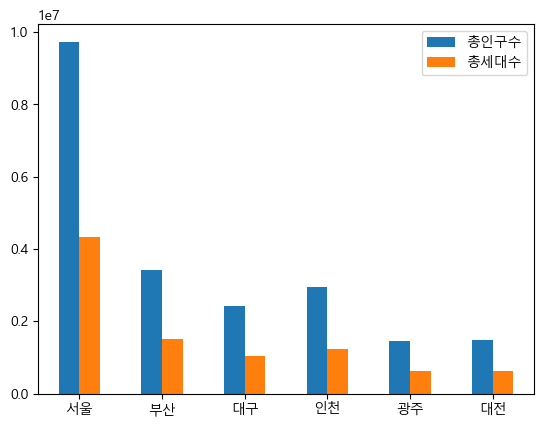

In [23]:
x1 = df.iloc[:6,1]
x1 = x1.values.tolist()
x2 = df.iloc[:6,2]
x2 = x2.values.tolist()
datatmp = pd.DataFrame({'총인구수':x1,'총세대수':x2},index=['서울','부산','대구','인천','광주','대전'])
ax = datatmp.plot.bar(rot=0) 
                                                 